In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import xgboost as xgb
import csv


import matplotlib.pyplot as plt
from scipy.stats import skew, randint, uniform
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional sklearn functions
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV   #Performing grid search
from sklearn.datasets import make_classification
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from numpy import loadtxt
from time import time

seed = 311
np.random.seed(seed)

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [15]:
#importing data
data = pd.read_csv("FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_WITH_SEASON_ShotON_OFF_REMOVED_TEAM_RATINGS_ADDED.csv")

In [16]:
data.head()

,Unnamed: 0,season,away_Defender_rating,home_Defender_rating,away_Attacker_rating,home_Attacker_rating,away_Goalkeeper_rating,home_Goalkeeper_rating,away_Midfielder_rating,home_Midfielder_rating,...,IWH,IWD,IWA,home_team_rating,away_team_rating,home_team_offensive_rating,away_team_offensive_rating,home_team_defensive_rating,away_team_defensive_rating,Label
0,0,2010/2011,64.500000,72.666667,67.666667,74.0,63.0,72.0,64.333333,73.833333,...,1.25,4.5,9.0,59.300000,46.287638,1.700000,1.356512,1.100000,1.317439,2
1,1,2010/2011,64.600000,65.666667,66.500000,69.0,69.0,71.0,66.000000,69.600000,...,1.65,3.3,4.4,46.287638,46.287638,1.356512,1.356512,1.317439,1.317439,2
2,2,2010/2011,64.000000,64.333333,67.000000,66.0,63.0,69.0,65.400000,65.600000,...,2.20,3.1,3.0,46.287638,69.700000,1.356512,1.900000,1.317439,0.900000,1
3,3,2010/2011,63.000000,64.750000,68.500000,65.0,71.0,65.0,69.666667,65.500000,...,2.50,3.3,2.4,46.287638,46.287638,1.356512,1.356512,1.317439,1.317439,0
4,4,2010/2011,64.666667,61.000000,67.333333,0.0,68.0,58.0,65.250000,61.000000,...,2.70,3.2,2.3,46.287638,46.287638,1.356512,1.356512,1.317439,1.317439,0


In [74]:
X = data.drop(['Label', 'Unnamed: 0'], axis=1)
y = data[['Label', 'season']].copy()

In [132]:
# 2008/2009 season
X8_9 = X[X['season'] == '2008/2009'].copy()
y8_9 = y[y['season'] == '2008/2009'].copy()

# 2009/2010 season
X9_10 = X[X['season'] == '2009/2010'].copy()
y9_10 = y[y['season'] == '2009/2010'].copy()

# 2010/2011 season
X10_11 = X[X['season'] == '2010/2011'].copy()
y10_11 = y[y['season'] == '2010/2011'].copy()

# 2011/2012 season
X11_12 = X[X['season'] == '2011/2012'].copy()
y11_12 = y[y['season'] == '2011/2012'].copy()

# 2012/2013 season
X12_13 = X[X['season'] == '2012/2013'].copy()
y12_13 = y[y['season'] == '2012/2013'].copy()

# 2013/2014 season
X13_14 = X[X['season'] == '2013/2014'].copy()
y13_14 = y[y['season'] == '2013/2014'].copy()

# 2014/2015 season
X14_15 = X[X['season'] == '2014/2015'].copy()
y14_15 = y[y['season'] == '2014/2015'].copy()

# 2015/2016 season
X15_16 = X[X['season'] == '2015/2016'].copy()
y15_16 = y[y['season'] == '2015/2016'].copy()

In [137]:
# Training set 1
X_train1 = X14_15
y_train1 = y14_15
          
# Training set 2
X_train2 = pd.concat((X14_15, X13_14))
y_train2 = pd.concat((y14_15, y13_14))

# Training set 3
X_train3 = pd.concat((X14_15, X13_14, X12_13))
y_train3 = pd.concat((y14_15, y13_14, y12_13))

# Training set 4
X_train4 = pd.concat((X14_15, X13_14, X12_13, X11_12))
y_train4 = pd.concat((y14_15, y13_14, y12_13, y11_12))

# Training set 5
X_train5 = pd.concat((X14_15, X13_14, X12_13, X11_12, X10_11))
y_train5 = pd.concat((y14_15, y13_14, y12_13, y11_12, y10_11))

# Training set 6
X_train6 = pd.concat((X14_15, X13_14, X12_13, X11_12, X10_11, X9_10))
y_train6 = pd.concat((y14_15, y13_14, y12_13, y11_12, y10_11, y9_10))

# Training set 7
X_train7 = pd.concat((X14_15, X13_14, X12_13, X11_12, X10_11, X9_10, X8_9))
y_train7 = pd.concat((y14_15, y13_14, y12_13, y11_12, y10_11, y9_10, y8_9))

# Testing set
X_test = X15_16
y_test = y15_16

X_train1 = X_train1.drop(['season'], axis=1)
X_train2 = X_train2.drop(['season'], axis=1)
X_train3 = X_train3.drop(['season'], axis=1)
X_train4 = X_train4.drop(['season'], axis=1)
X_train5 = X_train5.drop(['season'], axis=1)
X_train6 = X_train6.drop(['season'], axis=1)
X_train7 = X_train7.drop(['season'], axis=1)

y_train1 = y_train1.drop(['season'], axis=1)
y_train2 = y_train2.drop(['season'], axis=1)
y_train3 = y_train3.drop(['season'], axis=1)
y_train4 = y_train4.drop(['season'], axis=1)
y_train5 = y_train5.drop(['season'], axis=1)
y_train6 = y_train6.drop(['season'], axis=1)
y_train7 = y_train7.drop(['season'], axis=1)

X_test = X_test.drop(['season'], axis=1)
y_test = y_test.drop(['season'], axis=1)

In [104]:
ytwo = y_test[y_test['Label'] == 2].copy()
yone = y_test[y_test['Label'] == 1].copy()
yzero = y_test[y_test['Label'] == 0].copy()

print ytwo.shape
print yone.shape
print yzero.shape
sum = 979 + 556 + 671

print 979. / sum
print 556. / sum
print 671. / sum

(979, 1)
(556, 1)
(671, 1)
0.443789664551
0.252039891206
0.304170444243


# KNeighborsClassifier

## 1 Season Back

In [116]:
grid_params1 = {
    'n_neighbors': [95, 100, 105],
    'weights': ['distance'],
    'algorithm': ['auto'],
    'leaf_size': [1],
    'p': [1],
}

gsearch1 = GridSearchCV(
    estimator = KNeighborsClassifier(), 
    param_grid = grid_params1, 
    scoring='accuracy',
    cv=5)

start_time = time()

gsearch1.fit(X_train1,y_train1['Label'])
print gsearch1.grid_scores_
print gsearch1.best_params_
print gsearch1.best_score_

print ("Execution time: {0:.5f}".format(time() - start_time))

[mean: 0.44649, std: 0.00758, params: {'n_neighbors': 95, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.44563, std: 0.00646, params: {'n_neighbors': 100, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.44606, std: 0.00487, params: {'n_neighbors': 105, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}]
{'n_neighbors': 95, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}
0.446489726027
Execution time: 26.08297


In [117]:
gsearch1.score(X_test, y_test['Label'])

0.44152311876699907

## 2 Seasons Back

In [118]:
grid_params2 = {
    'n_neighbors': [150, 160, 170],
    'weights': ['distance'],
    'algorithm': ['auto'],
    'leaf_size': [1],
    'p': [1],
}

gsearch2 = GridSearchCV(
    estimator = KNeighborsClassifier(), 
    param_grid = grid_params2, 
    scoring='accuracy',
    cv=5)

start_time = time()

gsearch2.fit(X_train2,y_train2['Label'])
print gsearch2.grid_scores_
print gsearch2.best_params_
print gsearch2.best_score_

print ("Execution time: {0:.5f}".format(time() - start_time))

[mean: 0.45511, std: 0.00432, params: {'n_neighbors': 150, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.45557, std: 0.00542, params: {'n_neighbors': 160, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.45580, std: 0.00428, params: {'n_neighbors': 170, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}]
{'n_neighbors': 170, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}
0.45579793341
Execution time: 87.76495


In [119]:
gsearch2.score(X_test, y_test['Label'])

0.44741613780598366

## 3 Seasons Back

In [120]:
grid_params3 = {
    'n_neighbors': [100, 110, 120],
    'weights': ['distance'],
    'algorithm': ['auto'],
    'leaf_size': [1],
    'p': [1],
}

gsearch3 = GridSearchCV(
    estimator = KNeighborsClassifier(), 
    param_grid = grid_params3, 
    scoring='accuracy',
    cv=5)

start_time = time()

gsearch3.fit(X_train3,y_train3['Label'])
print gsearch3.grid_scores_
print gsearch3.best_params_
print gsearch3.best_score_

print ("Execution time: {0:.5f}".format(time() - start_time))

[mean: 0.45367, std: 0.00440, params: {'n_neighbors': 100, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.45398, std: 0.00298, params: {'n_neighbors': 110, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.45230, std: 0.00155, params: {'n_neighbors': 120, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}]
{'n_neighbors': 110, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}
0.453977445901
Execution time: 181.25947


In [121]:
gsearch3.score(X_test, y_test['Label'])

0.44152311876699907

## 4 Seasons Back

In [122]:
grid_params4 = {
    'n_neighbors': [125, 150, 175],
    'weights': ['distance'],
    'algorithm': ['auto'],
    'leaf_size': [1],
    'p': [1],
}

gsearch4 = GridSearchCV(
    estimator = KNeighborsClassifier(), 
    param_grid = grid_params4, 
    scoring='accuracy',
    cv=5)

start_time = time()

gsearch4.fit(X_train4,y_train4['Label'])
print gsearch4.grid_scores_
print gsearch4.best_params_
print gsearch4.best_score_

print ("Execution time: {0:.5f}".format(time() - start_time))

[mean: 0.45820, std: 0.00339, params: {'n_neighbors': 125, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.45843, std: 0.00105, params: {'n_neighbors': 150, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.45774, std: 0.00118, params: {'n_neighbors': 175, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}]
{'n_neighbors': 150, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}
0.458434501098
Execution time: 250.59446


In [123]:
gsearch4.score(X_test, y_test['Label'])

0.44650951949229373

## 5 Seasons Back

In [124]:
grid_params5 = {
    'n_neighbors': [300, 400, 500, 1000],
    'weights': ['distance'],
    'algorithm': ['auto'],
    'leaf_size': [1],
    'p': [1],
}

gsearch5 = GridSearchCV(
    estimator = KNeighborsClassifier(), 
    param_grid = grid_params5, 
    scoring='accuracy',
    cv=5)

start_time = time()

gsearch5.fit(X_train5,y_train5['Label'])
print gsearch5.grid_scores_
print gsearch5.best_params_
print gsearch5.best_score_

print ("Execution time: {0:.5f}".format(time() - start_time))

[mean: 0.45988, std: 0.00021, params: {'n_neighbors': 300, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.45959, std: 0.00009, params: {'n_neighbors': 400, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.45959, std: 0.00009, params: {'n_neighbors': 500, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.45959, std: 0.00009, params: {'n_neighbors': 1000, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}]
{'n_neighbors': 300, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}
0.459877722583
Execution time: 3128.76336


In [125]:
gsearch5.score(X_test, y_test['Label'])

0.44469628286491386

In [126]:
avg_accuracy = (gsearch1.score(X_test, y_test['Label']) + gsearch2.score(X_test, y_test['Label']) + gsearch3.score(X_test, y_test['Label']) + gsearch4.score(X_test, y_test['Label']) + gsearch5.score(X_test, y_test['Label']) + gsearch6.score(X_test, y_test['Label']) + gsearch7.score(X_test, y_test['Label'])) / 7.

In [127]:
avg_accuracy 

0.44433363553943783

## 6 Seasons Back

In [138]:
grid_params6 = {
    'n_neighbors': [300, 400, 500, 1000],
    'weights': ['distance'],
    'algorithm': ['auto'],
    'leaf_size': [1],
    'p': [1],
}

gsearch6 = GridSearchCV(
    estimator = KNeighborsClassifier(), 
    param_grid = grid_params6, 
    scoring='accuracy',
    cv=5)

start_time = time()

gsearch6.fit(X_train6,y_train6['Label'])
print gsearch6.grid_scores_
print gsearch6.best_params_
print gsearch6.best_score_

print ("Execution time: {0:.5f}".format(time() - start_time))

[mean: 0.46156, std: 0.00029, params: {'n_neighbors': 300, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.46148, std: 0.00019, params: {'n_neighbors': 400, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.46148, std: 0.00019, params: {'n_neighbors': 500, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.46148, std: 0.00019, params: {'n_neighbors': 1000, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}]
{'n_neighbors': 300, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}
0.46156370498
Execution time: 1577.55209


In [139]:
gsearch6.score(X_test, y_test['Label'])

0.44424297370806892

## 7 Seasons Back

In [140]:
grid_params7 = {
    'n_neighbors': [300, 400, 500, 1000],
    'weights': ['distance'],
    'algorithm': ['auto'],
    'leaf_size': [1],
    'p': [1],
}

gsearch7 = GridSearchCV(
    estimator = KNeighborsClassifier(), 
    param_grid = grid_params7, 
    scoring='accuracy',
    cv=5)

start_time = time()

gsearch7.fit(X_train7,y_train7['Label'])
print gsearch7.grid_scores_
print gsearch7.best_params_
print gsearch7.best_score_

print ("Execution time: {0:.5f}".format(time() - start_time))

[mean: 0.46272, std: 0.00070, params: {'n_neighbors': 300, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.46280, std: 0.00013, params: {'n_neighbors': 400, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.46280, std: 0.00013, params: {'n_neighbors': 500, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}, mean: 0.46280, std: 0.00013, params: {'n_neighbors': 1000, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}]
{'n_neighbors': 400, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto', 'p': 1}
0.462797728781
Execution time: 976.25491


In [141]:
gsearch7.score(X_test, y_test['Label'])

0.44378966455122393

## Plotting Accuracies

In [200]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

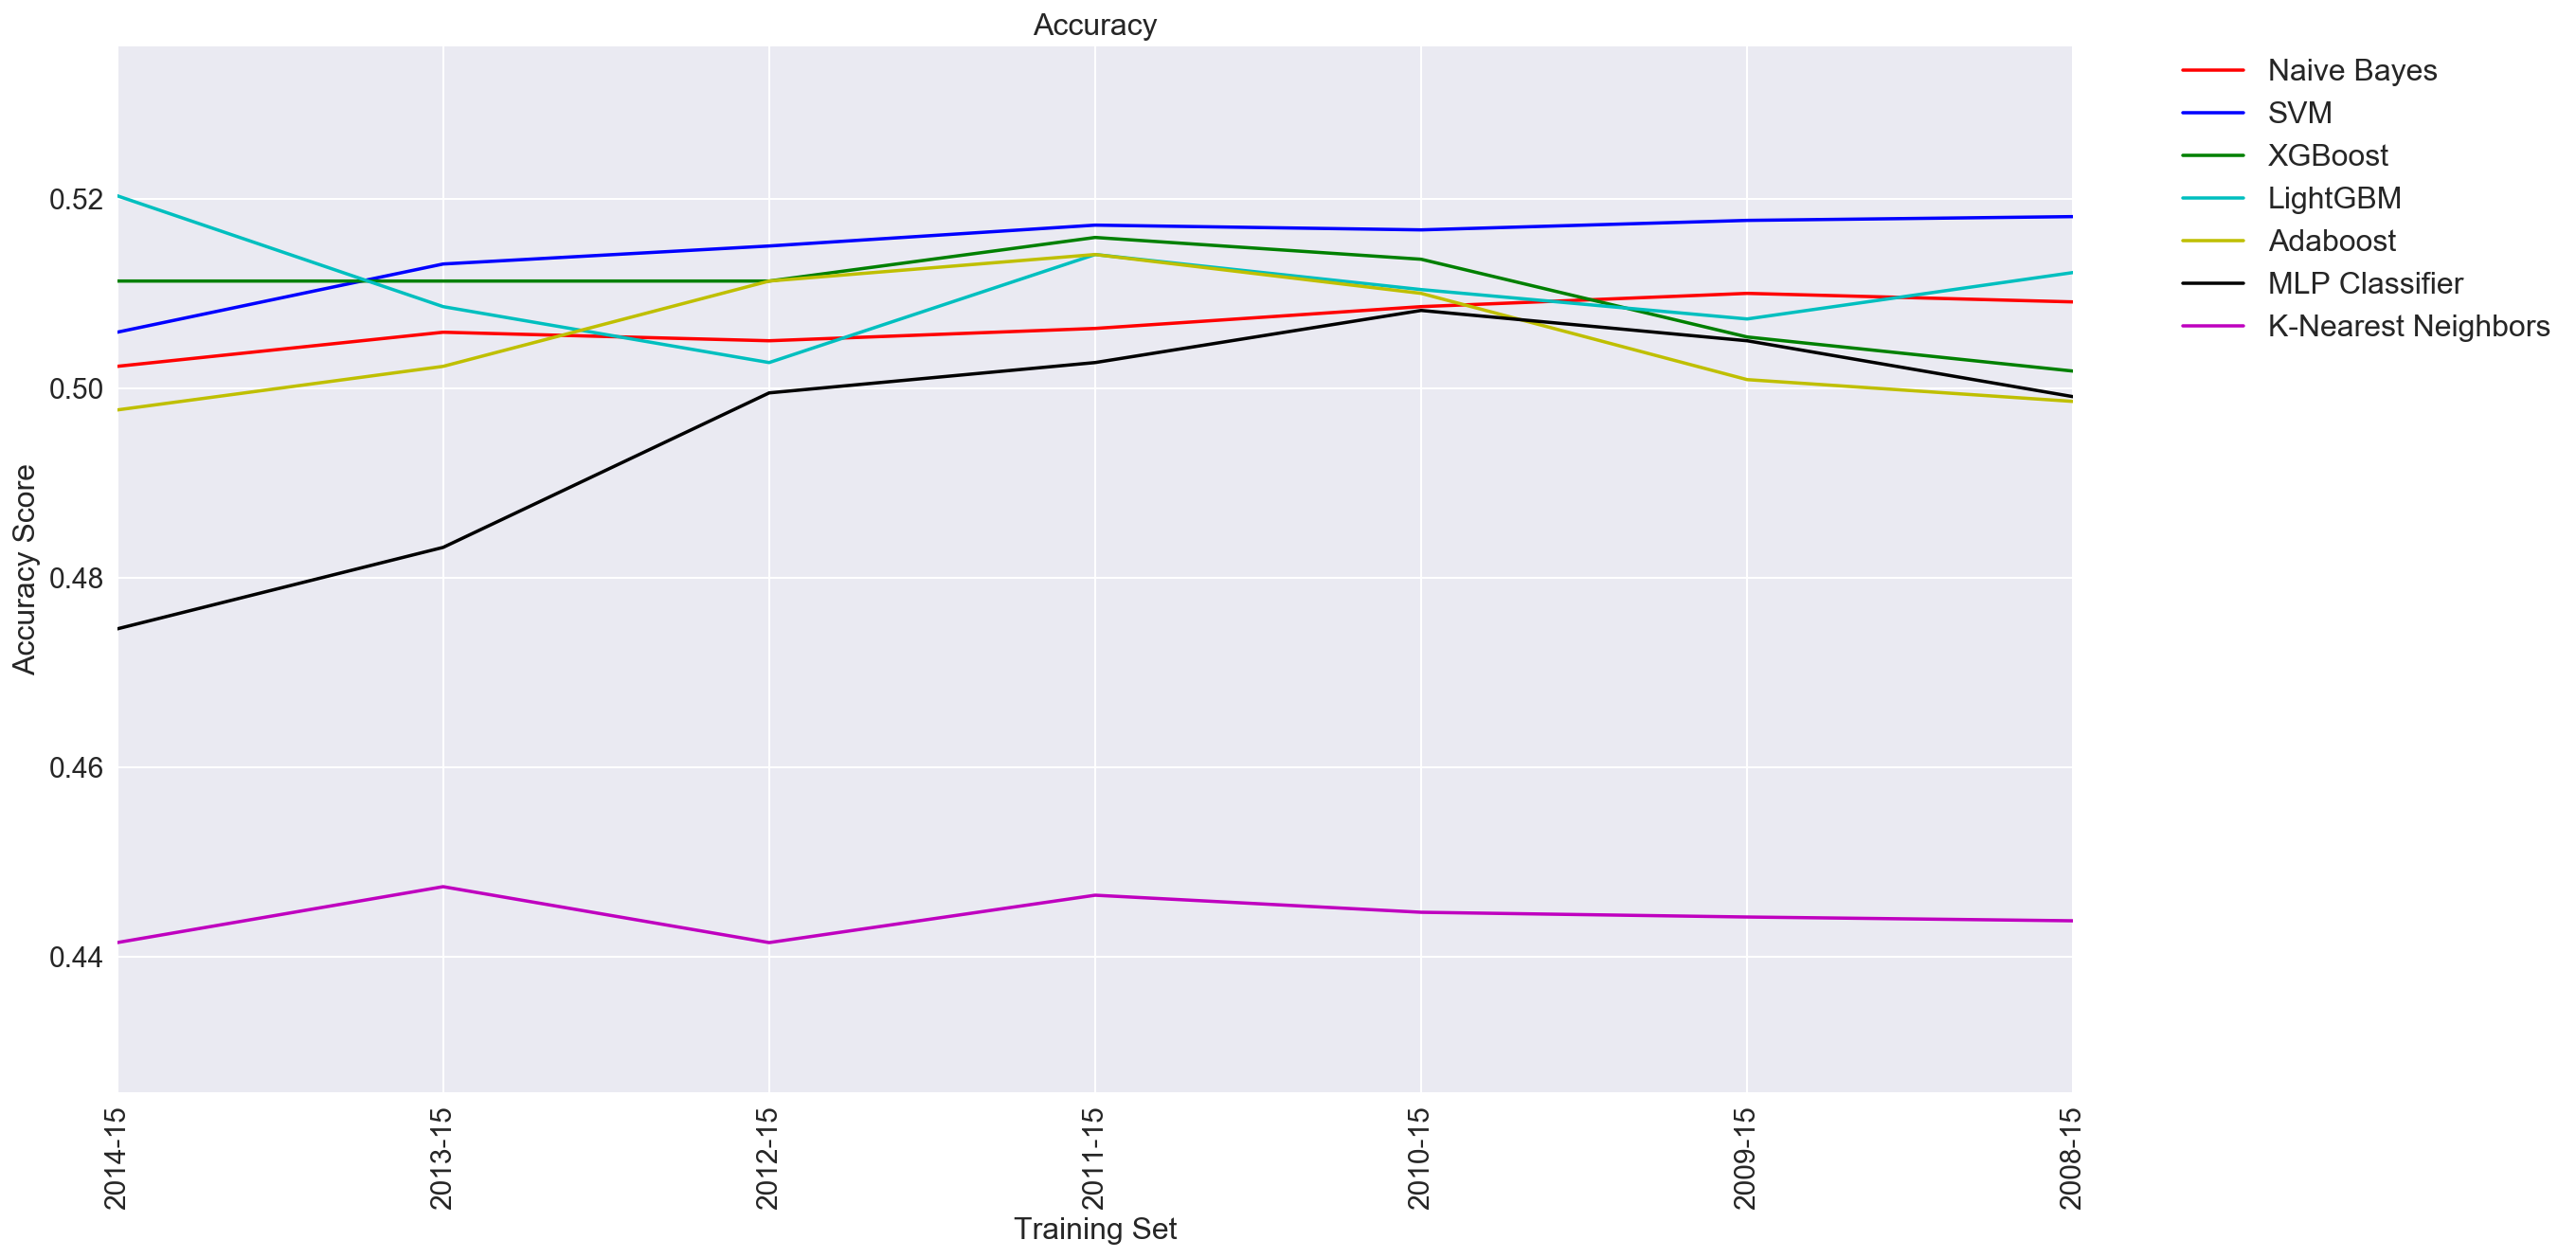

In [270]:
naive = [0.5023, 0.5059, 0.5050, 0.5063, 0.5086, 0.5100, 0.5091]
svm = [0.5059, 0.5131, 0.5150, 0.5172, 0.5167, 0.5177, 0.5181]
xgboost = [0.5113, 0.5113, 0.5113, 0.5159, 0.5136, 0.5054, 0.5018]
lightgbm = [0.5203, 0.5086, 0.5027, 0.5141, 0.5104, 0.5073, 0.5122]
adaboost = [0.4977, 0.5023, 0.5113, 0.5141, 0.5100, 0.5009, 0.4986]
mlp = [0.4746, 0.4832, 0.4995, 0.5027, 0.5082, 0.5050, 0.4991]
knearest = [0.4415, 0.4474, 0.4415, 0.4465, 0.4447, 0.4442, 0.4438]

labels = ['2014-15', '2013-15', '2012-15', '2011-15', '2010-15', '2009-15', '2008-15']
x = [0, 1, 2, 3, 4, 5, 6]

plt.plot(x, naive, 'r', label='Naive Bayes')
plt.plot(x, svm, 'b', label='SVM')
plt.plot(x, xgboost, 'g', label='XGBoost')
plt.plot(x, lightgbm, 'c', label='LightGBM')
plt.plot(x, adaboost, 'y', label='Adaboost')
plt.plot(x, mlp, 'k', label='MLP Classifier')
plt.plot(x, knearest, 'm', label='K-Nearest Neighbors')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=16)

plt.title("Accuracy", fontsize=16)
plt.xlabel("Training Set", fontsize=16)
plt.ylabel("Accuracy Score", fontsize=16)

axes = plt.gca()
axes.set_xlim([0,6])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)

fig.savefig('accuracy.png', bbox_inches='tight', dpi=200)
plt.show()

In [269]:
naive_mean = np.mean(naive)
svm_mean = np.mean(svm)
xgboost_mean = np.mean(xgboost)
lightgbm_mean = np.mean(lightgbm)
adaboost_mean = np.mean(adaboost)
mlp_mean = np.mean(mlp)
knearest_mean = np.mean(knearest)

temp = pd.DataFrame()
temp['names'] = ['K-Nearest Neighbors', 'MLP Classifier', 'XGBoost', 'Adaboost', 'Naive Bayes', 'LightGBM', 'SVM']
temp['values'] = [knearest_mean, mlp_mean, xgboost_mean, adaboost_mean, naive_mean, lightgbm_mean, svm_mean]

In [276]:
temp = temp.sort_values(by='values', ascending=False)

In [277]:
print temp

                 names    values
6                  SVM  0.514814
5             LightGBM  0.510800
2              XGBoost  0.510086
4          Naive Bayes  0.506743
3             Adaboost  0.504986
1       MLP Classifier  0.496043
0  K-Nearest Neighbors  0.444229


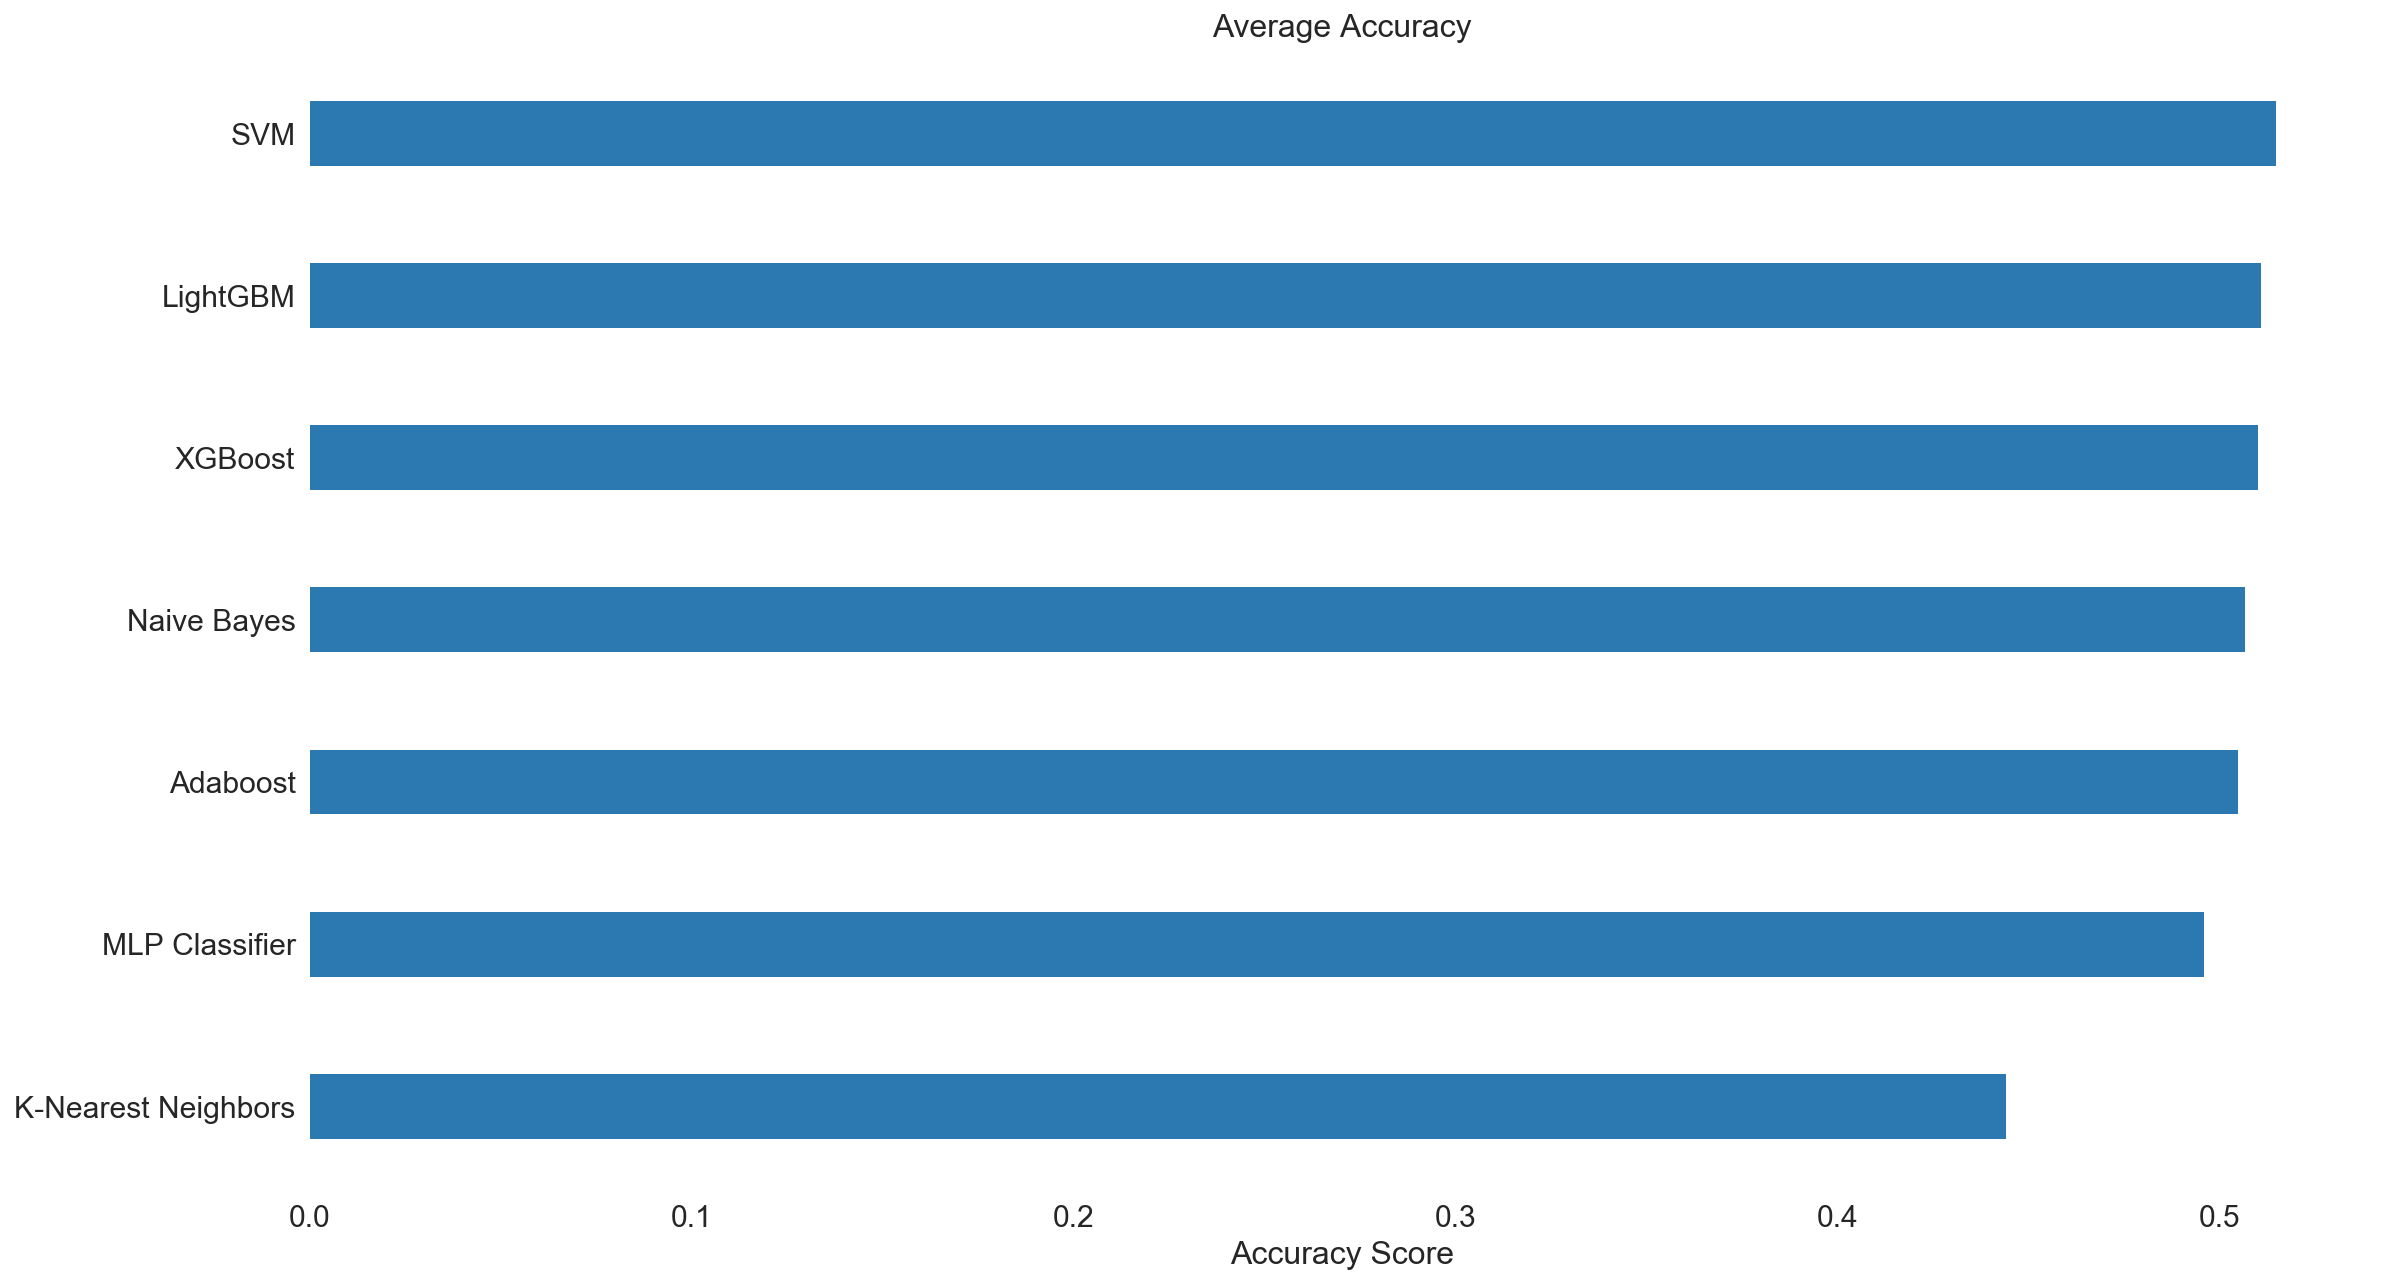

In [314]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(7)
means = [temp.iloc[6, temp.columns.get_loc('values')],
        temp.iloc[5, temp.columns.get_loc('values')],
        temp.iloc[4, temp.columns.get_loc('values')],
        temp.iloc[3, temp.columns.get_loc('values')],
        temp.iloc[2, temp.columns.get_loc('values')],
        temp.iloc[1, temp.columns.get_loc('values')],
        temp.iloc[0, temp.columns.get_loc('values')]]


fig, ax = plt.subplots()

bar_width = 0.4
bar = plt.barh(x, means, 0.4, color='#2B79B0')
plt.yticks(x, (temp.iloc[6, temp.columns.get_loc('names')],
                temp.iloc[5, temp.columns.get_loc('names')],
                temp.iloc[4, temp.columns.get_loc('names')],
                temp.iloc[3, temp.columns.get_loc('names')],
                temp.iloc[2, temp.columns.get_loc('names')],
                temp.iloc[1, temp.columns.get_loc('names')],
                temp.iloc[0, temp.columns.get_loc('names')]))

ax = plt.gca()
ax.set_facecolor('white')


plt.title("Average Accuracy", fontsize=16)
plt.xlabel("Accuracy Score", fontsize=16)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('average.png', bbox_inches='tight', dpi=200)



plt.show()